In [ ]:
import os
import json
from pathlib import Path
import pandas as pd

# Reading in the data

In [1]:
# Get the folder path from the environment variable
hun_em_poli_folder = os.environ.get('HUN_EM_POLI_FOLDER_PATH')

if hun_em_poli_folder is None:
    raise ValueError("HUN_EM_POLI_FOLDER_PATH environment variable is not set")

# Create a Path object for the folder
folder_path = Path(hun_em_poli_folder)

# Load all JSON files from the folder
json_data = []
for file_path in folder_path.glob('*.json'):
    with open(file_path, 'r', encoding='utf-8') as file:
        json_data.append(json.load(file))

print(f"Loaded {len(json_data)} JSON files from {folder_path}")

Loaded 1008 JSON files from E:\Datasets\HunEmPoli\Napirend_elotti_annotalt_javitott


In [4]:
emotion_hierarchy = {
    "Negative": {
        "Fear": {
            "Fear": {
                "Related concepts": [
                    "fear", "threat", "intimidation", "dread", "anxiety"
                ],
                "classId": "e_1"
            }
        },
        "Sadness": {
            "Suffering": {
                "Related concepts": [
                    "suffering", "deprivation", "misery", "poverty", "torment", "failure", "negative change"
                ],
                "classId": "e_2"
            },
            "Sorrow": {
                "Related concepts": [
                    "sorrow", "despair", "hopelessness", "melancholy"
                ],
                "classId": "e_3"
            },
            "Misfortune": {
                "Related concepts": [
                    "misfortune", "catastrophe"
                ],
                "classId": "e_4"
            }
        },
        "Anger": {
            "Crime": {
                "Related concepts": [
                    "crime", "terror", "assassination", "persecution", "cruelty", "organized crime", "vandalism", "intentional harm", "violence"
                ],
                "classId": "e_5"
            },
            "Anger": {
                "Related concepts": [
                    "anger", "fury", "hatred"
                ],
                "classId": "e_6"
            }
        },
        "Disgust": {
            "Conflict": {
                "Related concepts": [
                    "conflict", "confusion", "conflict of interest", "revenge", "punishment"
                ],
                "classId": "e_7"
            },
            "Contempt": {
                "Related concepts": [
                    "contempt", "mockery"
                ],
                "classId": "e_8"
            }
        }
    },
    "Positive": {
        "Success": {
            "Improvement": {
                "Related concepts": [
                    "improvement", "relief", "development", "success", "positive change"
                ],
                "classId": "e_9"
            }
        },
        "Joy": {
            "Joy": {
                "Related concepts": [
                    "joy", "enjoyment", "merriment", "serenity", "love", "acceptance", "tolerance"
                ],
                "classId": "e_10"
            }
        },
        "Trust": {
            "Assistance": {
                "Related concepts": [
                    "assistance", "rescue", "relief", "healing", "care", "deliverance"
                ],
                "classId": "e_11"
            },
            "Justice": {
                "Related concepts": [
                    "justice", "investigation"
                ],
                "classId": "e_12"
            }
        }
    }
}

In [9]:
for (k1,v1) in emotion_hierarchy.items():
    for (k2,v2) in v1.items():
        for (k3,v3) in v2.items():
            print(k1,k2,k3,v3)

Negative Fear Fear {'Related concepts': ['fear', 'threat', 'intimidation', 'dread', 'anxiety'], 'classId': 'e_1'}
Negative Sadness Suffering {'Related concepts': ['suffering', 'deprivation', 'misery', 'poverty', 'torment', 'failure', 'negative change'], 'classId': 'e_2'}
Negative Sadness Sorrow {'Related concepts': ['sorrow', 'despair', 'hopelessness', 'melancholy'], 'classId': 'e_3'}
Negative Sadness Misfortune {'Related concepts': ['misfortune', 'catastrophe'], 'classId': 'e_4'}
Negative Anger Crime {'Related concepts': ['crime', 'terror', 'assassination', 'persecution', 'cruelty', 'organized crime', 'vandalism', 'intentional harm', 'violence'], 'classId': 'e_5'}
Negative Anger Anger {'Related concepts': ['anger', 'fury', 'hatred'], 'classId': 'e_6'}
Negative Disgust Conflict {'Related concepts': ['conflict', 'confusion', 'conflict of interest', 'revenge', 'punishment'], 'classId': 'e_7'}
Negative Disgust Contempt {'Related concepts': ['contempt', 'mockery'], 'classId': 'e_8'}
Positi

In [21]:
emotion_table = pd.DataFrame(columns=["Sentiment","In Plutchik's system","Emotion topic","Related concepts","classId"])
for (k1,v1) in emotion_hierarchy.items():
    for (k2,v2) in v1.items():
        for (k3,v3) in v2.items():
            rel_con = v3['Related concepts']
            class_id = v3['classId']
            emotion_table.loc[len(emotion_table.index)] = [k1,k2,k3,rel_con,class_id]

         
print(emotion_table)

   Sentiment In Plutchik's system Emotion topic  \
0   Negative                 Fear          Fear   
1   Negative              Sadness     Suffering   
2   Negative              Sadness        Sorrow   
3   Negative              Sadness    Misfortune   
4   Negative                Anger         Crime   
5   Negative                Anger         Anger   
6   Negative              Disgust      Conflict   
7   Negative              Disgust      Contempt   
8   Positive              Success   Improvement   
9   Positive                  Joy           Joy   
10  Positive                Trust    Assistance   
11  Positive                Trust       Justice   

                                     Related concepts classId  
0        [fear, threat, intimidation, dread, anxiety]     e_1  
1   [suffering, deprivation, misery, poverty, torm...     e_2  
2         [sorrow, despair, hopelessness, melancholy]     e_3  
3                           [misfortune, catastrophe]     e_4  
4   [crime, terr

# Analysis

count the number of entities in each class

In [43]:
counts = {f"e_{i+1}":0 for i in range(12)}
for f in json_data:
    for entity in f['entities']:
        if entity['classId'] in counts.keys():
            counts[entity['classId']] += 1

counts

{'e_1': 619,
 'e_2': 9132,
 'e_3': 1581,
 'e_4': 12455,
 'e_5': 9389,
 'e_6': 3894,
 'e_7': 281,
 'e_8': 865,
 'e_9': 168,
 'e_10': 72,
 'e_11': 411,
 'e_12': 973}

[]

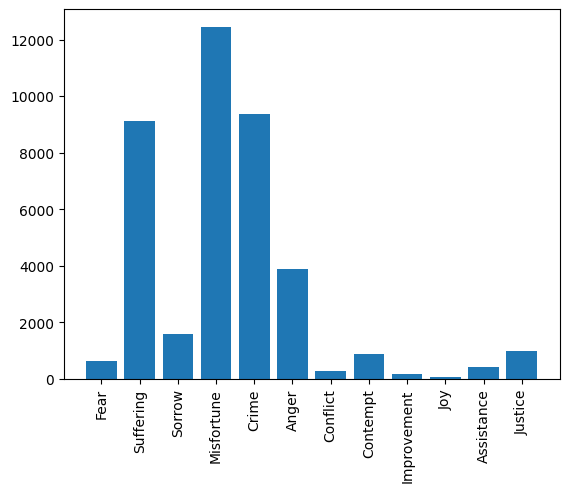

In [63]:
import matplotlib.pyplot as plt
d= {row._3:counts[row.classId ] for row in emotion_table.itertuples()}
plt.xticks(rotation='vertical')
plt.bar(d.keys(),d.values())
plt.plot()

# Sentiment analysis